# Heritage sites

In [1]:
import os
from datetime import datetime, timezone
from zipfile import ZipFile

import contextily as cx
import geopandas as gpd
import matplotlib.pyplot as plt
import pooch

## UNESCO Global Geoparks and Biospheres

<https://data.gov.ie/dataset/unesco-global-geoparks-and-biospheres>

In [2]:
# base data download directory
DATA_DIR = os.path.join("data", "heritage")
os.makedirs(DATA_DIR, exist_ok=True)

URL = (
    "https://data-housinggovie.opendata.arcgis.com/datasets/"
    "housinggovie::unesco-global-geoparks-and-biospheres.zip?"
    "outSR=%7B%22latestWkid%22%3A3857%2C%22wkid%22%3A102100%7D"
)
KNOWN_HASH = None
FILE_NAME = "unesco-global-geoparks-and-biospheres.zip"
DATA_FILE = os.path.join(DATA_DIR, FILE_NAME)

# basemap cache directory
cx.set_cache_dir(os.path.join("data", "basemaps"))

In [40]:
# download data if necessary
if not os.path.isfile(DATA_FILE):
    pooch.retrieve(
        url=URL,
        known_hash=KNOWN_HASH,
        fname=FILE_NAME,
        path=DATA_DIR
    )

    with open(f"{DATA_FILE[:-4]}.txt", "w", encoding="utf-8") as outfile:
        outfile.write(
            f"Data downloaded on: {datetime.now(tz=timezone.utc)}\n"
            f"Download URL: {URL}"
        )

SHA256 hash of downloaded file: d5bb0ab23f1fa58d02f34906d040a5862efc09ade0d4f4ba3d1b887f1b494d3e
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.


In [41]:
with open(f"{DATA_FILE[:-4]}.txt", encoding="utf-8") as f:
    print(f.read())

Data downloaded on: 2023-10-29 13:43:57.548256+00:00
Download URL: https://data-housinggovie.opendata.arcgis.com/datasets/housinggovie::unesco-global-geoparks-and-biospheres.zip?outSR=%7B%22latestWkid%22%3A3857%2C%22wkid%22%3A102100%7D


In [42]:
ZipFile(DATA_FILE).namelist()

['Heritage_Assets.shp',
 'Heritage_Assets.shx',
 'Heritage_Assets.dbf',
 'Heritage_Assets.cpg',
 'Heritage_Assets.prj',
 'Heritage_Assets.xml']

In [3]:
data2 = gpd.read_file(
    os.path.join(
        f"zip://{DATA_FILE}!" +
        [x for x in ZipFile(DATA_FILE).namelist() if x.endswith(".shp")][0]
    )
)

In [44]:
data2

,Name,Last_Updat,Policy01_N,Owning_Org,Metadata_L,Policy01_C,Policy01_P,NMPF_Chapt,NMPF_Cha_1,Map_name,Map_Featur,Map_Data_S,OBJECTID,MI_Map_num,Shape__Are,Shape__Len,geometry
0,Dublin Bay Biosphere,2021,Heritage Assets Policy 1,Clare County Council: Burren and Cliffs of Moh...,http://www.isde.ie/geonetwork/srv/eng/catalog....,HEA1,P,7.3,Heritage Assets,The Wild Atlantic Way and Coastal UNESCO Herit...,UNESCO Global Geoparks and Biospheres,UNESCO_Geoparks_Biospheres,1,9,8.544442e+08,174494.258757,"MULTIPOLYGON (((-694157.454 7043788.499, -6943..."
1,Copper Coast UNESCO Geopark,2021,Heritage Assets Policy 1,Clare County Council: Burren and Cliffs of Moh...,http://www.isde.ie/geonetwork/srv/eng/catalog....,HEA1,P,7.3,Heritage Assets,The Wild Atlantic Way and Coastal UNESCO Herit...,UNESCO Global Geoparks and Biospheres,UNESCO_Geoparks_Biospheres,2,9,2.433211e+08,98507.745747,"POLYGON ((-801209.067 6834181.165, -801221.129..."
2,Burren and Cliffs of Moher UNESCO Geopark,2021,Heritage Assets Policy 1,Clare County Council: Burren and Cliffs of Moh...,http://www.isde.ie/geonetwork/srv/eng/catalog....,HEA1,P,7.3,Heritage Assets,The Wild Atlantic Way and Coastal UNESCO Herit...,UNESCO Global Geoparks and Biospheres,UNESCO_Geoparks_Biospheres,3,9,1.452018e+09,277066.411154,"MULTIPOLYGON (((-1014763.421 7009235.836, -101..."


In [45]:
data2.shape

(3, 17)

In [46]:
data2.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

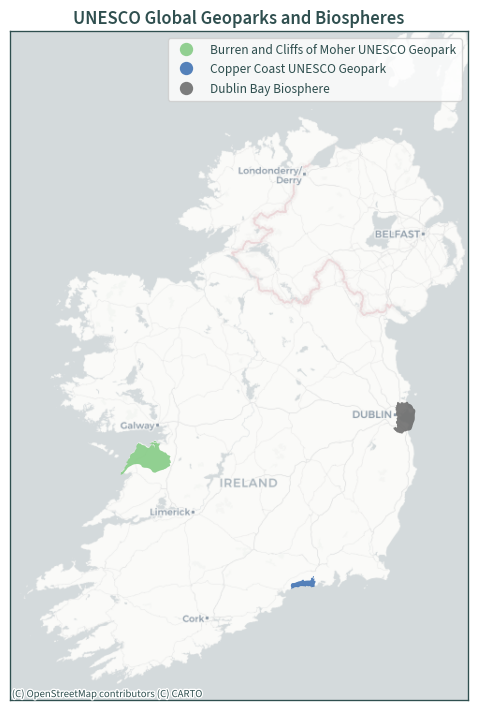

In [4]:
ax = data2.plot(
    figsize=(7.5, 7.5), column="Name", legend=True, cmap="Accent", alpha=.85
)
plt.xlim(-1.2e6, -0.6e6)
plt.ylim(6.675e6, 7.55e6)
cx.add_basemap(ax, source=cx.providers.CartoDB.Positron, zoom=7)
plt.title("UNESCO Global Geoparks and Biospheres")

plt.tick_params(labelbottom=False, labelleft=False)
plt.tight_layout()
plt.show()

## Shipwrecks in Irish Waters

<https://isde.ie/geonetwork/srv/eng/catalog.search#/metadata/ie.marine.data:dataset.5131>

In [3]:
URL = (
    "https://gsi.geodata.gov.ie/downloads/Marine/Data/Downloads/Shapefiles/"
    "IE_GSI_MI_Shipwrecks_IE_Waters_WGS84_LAT.zip"
)
FILE_NAME = "IE_GSI_MI_Shipwrecks_IE_Waters_WGS84_LAT.zip"
DATA_FILE = os.path.join(DATA_DIR, FILE_NAME)

In [4]:
# download data if necessary
if not os.path.isfile(DATA_FILE):
    pooch.retrieve(
        url=URL,
        known_hash=KNOWN_HASH,
        fname=FILE_NAME,
        path=DATA_DIR
    )

    with open(f"{DATA_FILE[:-4]}.txt", "w", encoding="utf-8") as outfile:
        outfile.write(
            f"Data downloaded on: {datetime.now(tz=timezone.utc)}\n"
            f"Download URL: {URL}"
        )

SHA256 hash of downloaded file: 981e15971fef419a1ee542f70d8114934e46c79571426890ec43b1694edbbc38
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.


In [5]:
with open(f"{DATA_FILE[:-4]}.txt", encoding="utf-8") as f:
    print(f.read())

Data downloaded on: 2023-10-29 16:58:36.620926+00:00
Download URL: https://gsi.geodata.gov.ie/downloads/Marine/Data/Downloads/Shapefiles/IE_GSI_MI_Shipwrecks_IE_Waters_WGS84_LAT.zip


In [6]:
ZipFile(DATA_FILE).namelist()

['IE_GSI_MI_Shipwrecks_IE_Waters_WGS84_LAT.cpg',
 'IE_GSI_MI_Shipwrecks_IE_Waters_WGS84_LAT.dbf',
 'IE_GSI_MI_Shipwrecks_IE_Waters_WGS84_LAT.prj',
 'IE_GSI_MI_Shipwrecks_IE_Waters_WGS84_LAT.sbn',
 'IE_GSI_MI_Shipwrecks_IE_Waters_WGS84_LAT.sbx',
 'IE_GSI_MI_Shipwrecks_IE_Waters_WGS84_LAT.shp',
 'IE_GSI_MI_Shipwrecks_IE_Waters_WGS84_LAT.shp.xml',
 'IE_GSI_MI_Shipwrecks_IE_Waters_WGS84_LAT.shx',
 'IE_GSI_MI_Shipwrecks_IE_Waters_WGS84_LAT.lyr',
 'ie_gsi_mi_shipwrecks_ie_waters_wgs84_lat.lyr.xml',
 'IE_GSI_MI_Shipwrecks_IE_Waters_WGS84_LAT.lyrx',
 'IE_GSI_MI_Shipwrecks_IE_Waters_WGS84_LAT.qml',
 'IE_GSI_MI_Shipwrecks_IE_Waters_WGS84_LAT.sld',
 'IE_GSI_MI_Shipwrecks_IE_Waters_WGS84_LAT.style',
 'ie_gsi_mi_shipwrecks_ie_waters_wgs84_lat.style.xml',
 'IE_GSI_MI_Shipwrecks_IE_Waters_WGS84_LAT.stylx',
 'ie_gsi_mi_shipwrecks_ie_waters_wgs84_lat.stylx.xml']

In [7]:
data3 = gpd.read_file(
    os.path.join(
        f"zip://{DATA_FILE}!" +
        [x for x in ZipFile(DATA_FILE).namelist() if x.endswith(".shp")][0]
    )
)

In [9]:
data3.head()

,SHIPWK_ID,SURVEY_ID,LATITUDE,LONGITUDE,WRECKLEN_M,WRECKWID_M,H2ODEPTH_M,VESSELNAME,VESSELTYPE,DATE_LOSS,GSI_REF,NMS_REF,COMMENTS,URL_PDF,URL_IMAGE,URL3DMODEL,REPORTTYPE,geometry
0,IE_GSI_shipwk_ID_117,CE04_04,55.49957,-7.43245,65.0,7.0,56.863,U-218,Submarine (Deadlight),1945-12-04,117,W10125,Wreck,NaN,https://gsi.geodata.gov.ie/downloads/Marine/Da...,NaN,Image,POINT (-7.43245 55.49957)
1,IE_GSI_shipwk_ID_118,CE04_04,55.31280,-6.89522,143.0,23.0,60.169,NaN,Unknown,NaN,118,NaN,Elongate but curved and wide like rock,NaN,https://gsi.geodata.gov.ie/downloads/Marine/Da...,NaN,Image,POINT (-6.89522 55.31280)
2,IE_GSI_shipwk_ID_2,CE03_01,55.80613,-9.22711,123.0,27.0,137.248,NaN,Unknown,NaN,2,NaN,Wreck,NaN,https://gsi.geodata.gov.ie/downloads/Marine/Da...,NaN,Image,POINT (-9.22711 55.80613)
3,IE_GSI_shipwk_ID_3,CE03_02,55.97290,-8.76272,50.0,8.5,132.226,NaN,Unknown,NaN,3,NaN,Wreck,NaN,https://gsi.geodata.gov.ie/downloads/Marine/Da...,NaN,Image,POINT (-8.76272 55.97290)
4,IE_GSI_shipwk_ID_5,CE03_02,55.94973,-8.19291,75.0,18.0,173.479,Gi-ara,Cargo Vessel,NaN,5,NaN,Wreck,NaN,https://gsi.geodata.gov.ie/downloads/Marine/Da...,NaN,Image,POINT (-8.19291 55.94973)


In [8]:
data3.shape

(497, 18)

In [10]:
data3.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

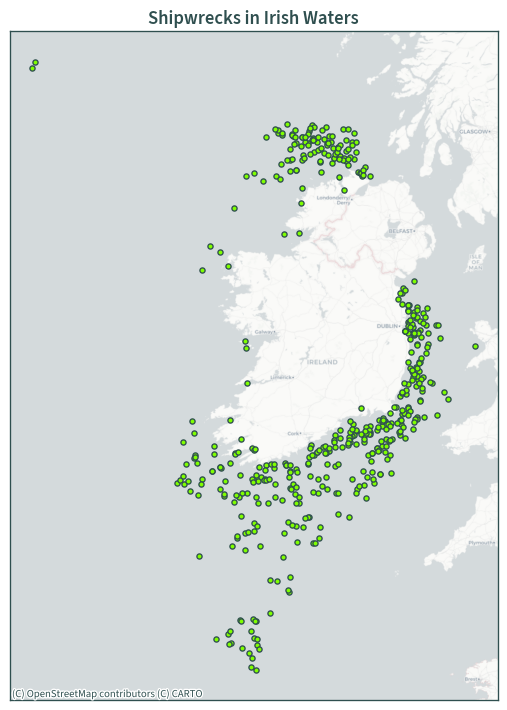

In [18]:
ax = data3.to_crs(3857).plot(
    figsize=(7.5, 7.5), edgecolor="darkslategrey", markersize=15,
    color="chartreuse"
)
cx.add_basemap(ax, source=cx.providers.CartoDB.Positron)
plt.title("Shipwrecks in Irish Waters")

plt.tick_params(labelbottom=False, labelleft=False)
plt.tight_layout()
plt.show()